In [1]:
import pybamm
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

In [5]:
model = pybamm.lithium_ion.DFN(options={"thermal": "lumped"})
param = pybamm.ParameterValues("OKane2023")
param.update({"Ambient temperature [K]": 313.15})
param.update({"Initial temperature [K]": 313.15})
param.update({"Maximum concentration in negative electrode [mol.m-3]": 32544})
param.update({"Maximum concentration in positive electrode [mol.m-3]": 56598})
param.update({"Initial concentration in negative electrode [mol.m-3]": 28162})
param.update({"Initial concentration in positive electrode [mol.m-3]": 15281})
exp = pybamm.Experiment(["Discharge at C/10 for 3 hours", "Rest for 1 hour", "Charge at 0.3 C for 90 minutes"])

var_pts = {
    "x_n": 7,  # negative electrode
    "x_s": 7,  # separator 
    "x_p": 7,  # positive electrode
    "r_n": 100,  # negative particle
    "r_p": 30,  # positive particle
}

sim = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=var_pts)
solution = sim.solve(calc_esoh=False)

2023-01-17 14:05:17.311 - [WARNING] callbacks.on_experiment_infeasible(233): 

	Experiment is infeasible: 'event: Maximum voltage' was triggered during 'Charge at 0.3 C for 90 minutes'. The returned solution only contains up to step 1 of cycle 3. 


In [6]:
t = solution.cycles[2]["Time [s]"].entries
phis_CC = solution.cycles[2]["Negative electrode potential [V]"].entries[0,:]
phis_sep = solution.cycles[2]["Negative electrode potential [V]"].entries[-1,:]
phie_CC = solution.cycles[2]["Negative electrolyte potential [V]"].entries[0,:]
phie_sep = solution.cycles[2]["Negative electrolyte potential [V]"].entries[-1,:]

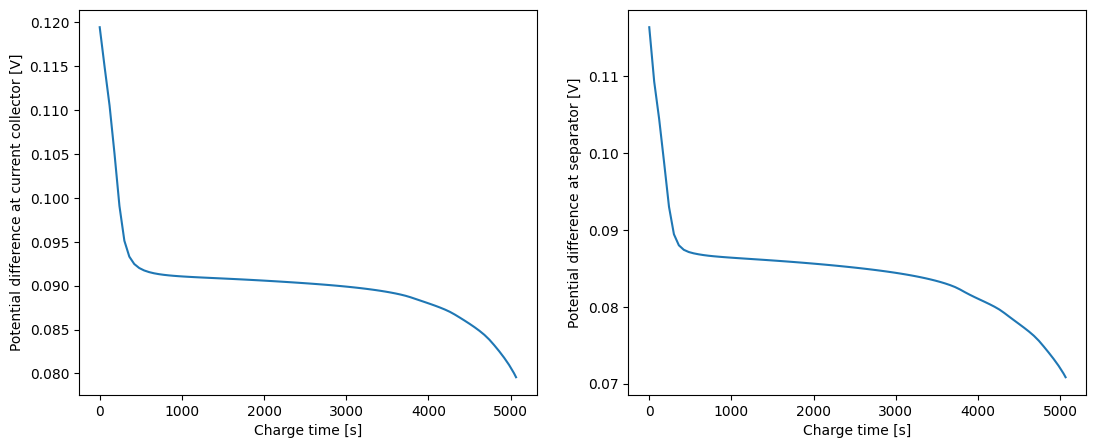

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13,5))
ax1.plot(t-t[0],phis_CC-phie_CC)
ax1.set_xlabel("Charge time [s]")
ax1.set_ylabel("Potential difference at current collector [V]")
ax2.plot(t-t[0],phis_sep-phie_sep)
ax2.set_xlabel("Charge time [s]")
ax2.set_ylabel("Potential difference at separator [V]")
plt.show()

In [8]:
phis_sep[-1]-phie_sep[-1]

0.07082749823304303